In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity


In [25]:
df = pd.read_csv('../outputs/eci_software_2020_2023.csv',sep=';')

to do:
- map of people leaving russia with arrows
- eci software /year of:
    - Russia
    - Synth control
    - Target countries (including C1-C3)
- log RCA of russia 2020 vs C1-C3 2020, again in 2023
- lollipop of RCA vectors Russia vs C1-C3 (2020 vs 2021 vs 2023)

In [56]:
emigration = ['GE','ME','CY','AM','KZ','AE','RS','KZ','LT','EE','UZ']

def rus_emi_other(xx):
    if xx in emigration:
        return 'Top emigration destination'
    elif xx =='RU':
        return 'Russia'
    else:
        return 'Other'

df['is_emi'] = df['iso2_code'].map(rus_emi_other)


In [57]:
yearly_eci_df=df.drop_duplicates(['iso2_code','year']).sort_values('year')

In [58]:
df2020 = df[df['year']==2020]

In [60]:
gb=df2020.groupby(['iso2_code','language']).rca.mean().unstack(1)
gb.head(2)

language,ANTLR,ASP.NET,Ada,Apex,AppleScript,Assembly,AutoHotkey,Awk,Batchfile,Blade,...,VHDL,Verilog,Vim Script,Vim Snippet,Visual Basic .NET,Vue,XS,XSLT,Yacc,sed
iso2_code,,,,,,,,,,,,,,,,,,,,,
AE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.884235,0.0,...,0.0,0.0,0.0,0.0,0.0,0.736168,0.0,0.0,0.0,0.0
AF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [61]:
russia_vector = gb.loc['RU'].values.reshape(1, -1)
other_countries = gb.drop('RU')

# Calculate distances and similarities
euclidean_dist = euclidean_distances(other_countries, russia_vector)
cosine_sim = cosine_similarity(other_countries, russia_vector)

# Convert distances and similarities to Series for easier handling
euclidean_series = pd.Series(euclidean_dist.flatten(), index=other_countries.index)
cosine_series = pd.Series(cosine_sim.flatten(), index=other_countries.index)









In [50]:
cosine_series.sort_values().tail(),euclidean_series.sort_values().tail()

(iso2_code
 PL    0.836439
 NL    0.842381
 GB    0.857193
 DE    0.868943
 CA    0.897396
 dtype: float64,
 iso2_code
 IQ    18.346581
 PS    20.402140
 ID    22.395904
 IN    22.701036
 SN    39.693927
 dtype: float64)

In [54]:
gb.corrwith(gb.loc['RU'],axis=1,method='spearman').sort_values().tail(10)

iso2_code
SE    0.227812
CN    0.240652
UA    0.247601
GB    0.248005
CA    0.310930
DE    0.342227
NL    0.347368
FR    0.375494
PL    0.431425
RU    1.000000
dtype: float64

In [191]:
df[df['iso2_code']=='RU'].head(20)

,iso2_code,language,num_pushers,period,diversity,ubiquity,mcp,eci,pci,density,coi,cog,rca,year,is_emi
16124,RU,ANTLR,325,1,74,17,1,1.856372,2.335159,0.634414,2.071637,0.000000,1.253170,2020,Russia
16125,RU,ASP.NET,603,1,74,38,0,1.856372,0.283921,0.518572,2.071637,-0.227311,0.857723,2020,Russia
16126,RU,Ada,112,1,74,9,0,1.856372,2.289965,0.573188,2.071637,0.411686,0.740320,2020,Russia
16127,RU,Apex,0,1,74,7,0,1.856372,2.001467,0.543506,2.071637,0.434563,0.000000,2020,Russia
16128,RU,AppleScript,161,1,74,9,0,1.856372,2.593304,0.594845,2.071637,0.510915,0.984770,2020,Russia
16129,RU,Assembly,2776,1,74,32,1,1.856372,1.955641,0.631595,2.071637,0.000000,1.180247,2020,Russia
16130,RU,AutoHotkey,109,1,74,10,1,1.856372,2.598817,0.636145,2.071637,0.000000,1.011063,2020,Russia
16131,RU,Awk,912,1,74,27,1,1.856372,2.168861,0.626592,2.071637,0.000000,1.157115,2020,Russia
16132,RU,Batchfile,8494,1,74,36,1,1.856372,1.747184,0.626157,2.071637,0.000000,1.277129,2020,Russia
16133,RU,Blade,1289,1,74,54,0,1.856372,-0.460607,0.475672,2.071637,-0.477092,0.881488,2020,Russia


In [86]:
annual_eci_scores=df.groupby(['iso2_code','year'])['eci'].mean().reset_index()
annual_eci_scores.rename(columns={'iso2_code':'Country'})

,Country,year,eci
0,AD,2023,-1.408583
1,AE,2020,-0.294460
2,AE,2021,-0.309502
3,AE,2022,0.017675
4,AE,2023,0.277591
...,...,...,...
613,ZM,2023,-0.641175
614,ZW,2020,-0.754295
615,ZW,2021,-0.728048
616,ZW,2022,-0.465976


<Figure size 500x600 with 0 Axes>

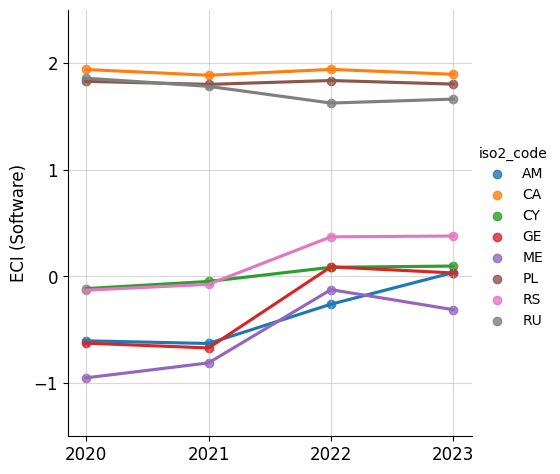

In [137]:
plt.figure(figsize=(5,6))
sns.lmplot(x='year',y='eci',hue='iso2_code',lowess=True,
           data=annual_eci_scores[annual_eci_scores['iso2_code'].isin([
               'CA','PL','RU','GE','ME','CY','AM','RS'])])
plt.xticks([2020,2021,2022,2023],size=12)
plt.yticks([-1,0,1,2],size=12)
plt.ylim([-1.5,2.5])
plt.ylabel('ECI (Software)',size=12)
plt.xlabel('')
plt.grid(alpha=.5)
plt.show()


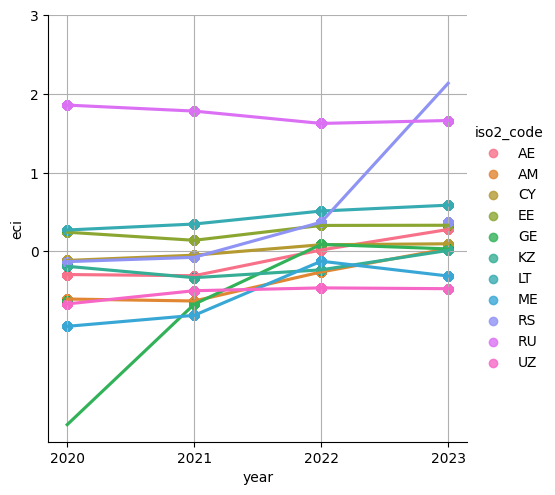

In [64]:
sns.lmplot(x='year',y='eci',hue='iso2_code',lowess=True,
           data=df[df['iso2_code'].isin(['RU','GE','ME','CY','AM','KZ','AE','RS','KZ','LT','EE','UZ'])],ci=0)
plt.xticks([2020,2021,2022,2023])
plt.yticks([0,1,2,3])
plt.grid()
plt.show()


In [274]:
df[(df['year']==2021)&(df['iso2_code'].isin(['RU','GE']))].groupby


,iso2_code,language,num_pushers,period,diversity,ubiquity,mcp,eci,pci,density,coi,cog,rca,year,is_emi
27587,GE,ANTLR,0,1,12,19,0,-0.672025,2.266022,0.013855,-0.735700,1.194214,0.000000,2021,Top emigration destination
27588,GE,ASP.NET,0,1,12,38,0,-0.672025,0.245440,0.132288,-0.735700,0.118618,0.000000,2021,Top emigration destination
27589,GE,Ada,0,1,12,9,0,-0.672025,2.349027,0.008274,-0.735700,1.041789,0.000000,2021,Top emigration destination
27590,GE,Apex,0,1,12,7,0,-0.672025,2.080937,0.009435,-0.735700,0.940465,0.000000,2021,Top emigration destination
27591,GE,AppleScript,0,1,12,11,0,-0.672025,2.511345,0.008269,-0.735700,1.252652,0.000000,2021,Top emigration destination
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37948,RU,Vue,6191,1,72,59,1,1.780353,-0.506694,0.537678,2.400213,-0.000000,1.113403,2021,Russia
37949,RU,XS,245,1,72,13,1,1.780353,2.062189,0.570821,2.400213,0.000000,1.347786,2021,Russia
37950,RU,XSLT,1390,1,72,30,0,1.780353,1.954708,0.563942,2.400213,0.368070,0.981905,2021,Russia
37951,RU,Yacc,824,1,72,29,1,1.780353,2.098227,0.591814,2.400213,0.000000,1.006129,2021,Russia


In [338]:
df['rca_binary']=df['rca'].apply(lambda x: 1 if x>1 else 0)


In [405]:
df.groupby(['iso2_code','year','language'])['rca'].mean().unstack(2).fillna(0).transpose().reset_index()[['RU','GE']]

iso2_code        RU                                      GE            \
year           2020      2021      2022      2023      2020      2021   
0          1.253170  1.122282  0.945042  0.824539  0.000000  0.000000   
1          0.857723  0.854446  0.870031  0.783349  0.000000  0.000000   
2          0.740320  0.971997  1.125003  1.015710  0.000000  0.000000   
3          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4          0.984770  1.023097  0.928399  0.797150  0.000000  0.000000   
..              ...       ...       ...       ...       ...       ...   
145        1.050652  1.113403  1.177521  1.247160  1.821905  1.283471   
146        1.458752  1.347786  1.158230  1.155435  0.000000  0.000000   
147        0.941058  0.981905  0.831038  0.707102  0.000000  0.000000   
148        1.028897  1.006129  0.933717  0.916270  0.000000  0.000000   
149        1.002488  0.886238  0.786403  0.756073  0.000000  0.000000   

iso2_code                      
year           2022      2023  
0          0.000000  0.000000  
1          0.000000  0.000000  
2          0.000000  0.000000  
3          0.000000  0.000000  
4          0.000000  0.000000  
..              ...       ...  
145        1.113939  1.349422  
146        0.000000  0.000000  
147        0.000000  0.000000  
148        0.000000  0.000000  
149        0.000000  0.000000  

[150 rows x 8 columns]

In [461]:
langs = set(df[(df['iso2_code']=='RU')&(df['rca']>0)].language.unique())
langs.update(df[(df['iso2_code']=='GE')&(df['rca']>0)].language.unique())

In [479]:
ubi_order=list(
    df[(df['year']==2021)&(df['iso2_code']=='RU')].groupby('language').rca.mean().sort_values().index)
ubi_order=[x for x in ubi_order if x in langs]

In [548]:
np.vstack([v0,v1,v2,v3,v4])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.8461851 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.80387345, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.9573844 , 0.        , 0.        ,
        0.        , 0.79854884, 0.        , 0.        , 0.        ,
        0.        , 1.12800849, 0.        , 1.19888474, 0.        ,
        0.        , 0.        , 1.14144371, 1.16025914, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.31563628, 0.        ,
        0.        , 0.        , 0.        , 0.65615324, 0.        ,
        0.        , 0.        , 0.79958514, 0.        , 0.        ,
        0.        , 0.        , 1.31141725, 0.  

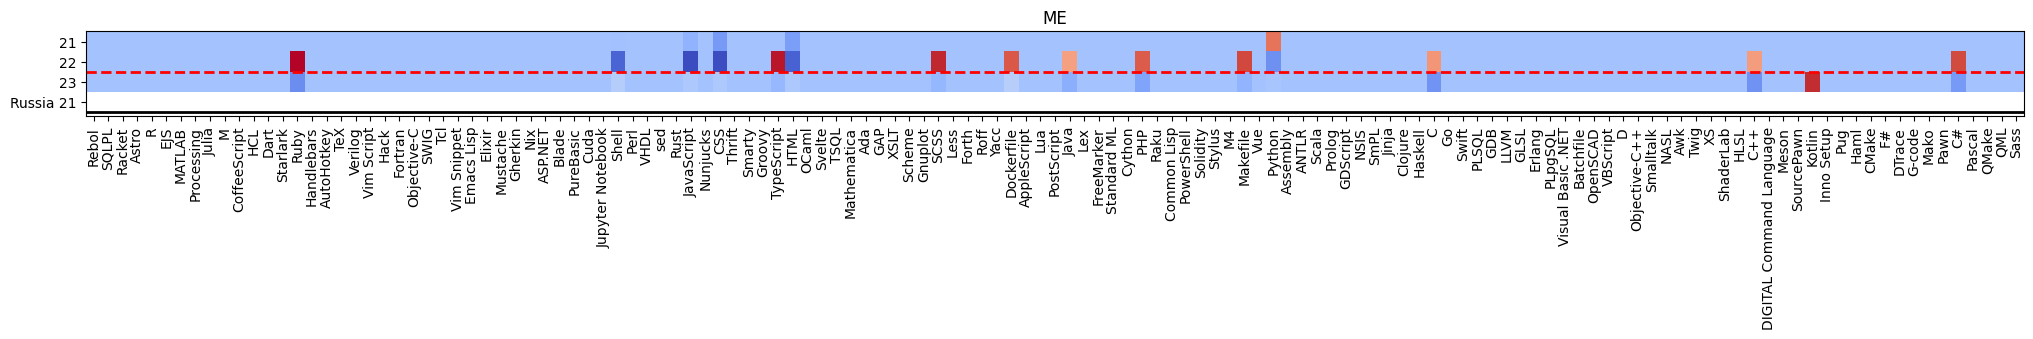

In [585]:
comp= 'ME'
d0=dict(
    df[(df['iso2_code']==comp)&(df['year']==2020)&(df['language'].isin(ubi_order))][['language','rca']].values)

d1=dict(
    df[(df['iso2_code']==comp)&(df['year']==2021)&(df['language'].isin(ubi_order))][['language','rca']].values)
d2=dict(
    df[(df['iso2_code']==comp)&(df['year']==2022)&(df['language'].isin(ubi_order))][['language','rca']].values)
d3=dict(
    df[(df['iso2_code']==comp)&(df['year']==2023)&(df['language'].isin(ubi_order))][['language','rca']].values)

d4=dict(
    df[(df['iso2_code']=='RU')&(df['year']==2021)&(df['language'].isin(ubi_order))][['language','rca']].values)

v0 = [d0.get(x,0) for x in ubi_order]
v1 = [d1.get(x,0) for x in ubi_order]
v2 = [d2.get(x,0) for x in ubi_order]
v3 = [d3.get(x,0) for x in ubi_order]
v4 = [d4.get(x,0) for x in ubi_order]

#v0 = [1 if x >1 else 0 for x in v0]
#v1 = [1 if x >1 else 0 for x in v1]
#v2 = [1 if x >1 else 0 for x in v2]
#v3 = [1 if x >1 else 0 for x in v3]
#v4 = [1 if x >1 else 0 for x in v4]

#v0 = [np.arcsinh(x) for x in v0]
#v1 = [np.arcsinh(x) for x in v1]
#v2 = [np.arcsinh(x) for x in v2]
#v3 = [np.arcsinh(x) for x in v3]
#v4 = [np.arcsinh(x) for x in v4]

#v0 = [np.log(x+min(x for x in v0+v1+v2+v3+v4 if x != 0)/10) for x in v0]
#v1 = [np.log(x+min(x for x in v0+v1+v2+v3+v4 if x != 0)/10) for x in v1]
#v2 = [np.log(x+min(x for x in v0+v1+v2+v3+v4 if x != 0)/10) for x in v2]
#v3 = [np.log(x+min(x for x in v0+v1+v2+v3+v4 if x != 0)/10) for x in v3]
#v4 = [np.log(x+min(x for x in v0+v1+v2+v3+v4 if x != 0)/10) for x in v4]

fig, ax = plt.subplots(figsize=(25, 1.1)) 
absolute_changes = np.diff(np.vstack([v0,v1,v2,v3]), axis=0)
#percentage_changes = np.diff(np.vstack([v0,v1,v2,v3]), axis=0) / np.vstack([v0,v1,v2,v3])[:-1] * 100

cax = ax.imshow(np.vstack([absolute_changes]), cmap='coolwarm', interpolation='nearest', aspect='auto')
#cax = ax.imshow(np.vstack([v0,v1,v2,v3,v4]), cmap='Greens', interpolation='nearest', aspect='auto')
ax.set_yticks([0, 1,2,3])
ax.set_yticklabels(['21','22','23', 'Russia 21'])
#ax.set_yticks([0, 1,2,3,4])
#ax.set_yticklabels(['20','21','22','23', 'Russia 21'])

plt.title(comp)
ax.set_xticks([x for x in range(len(ubi_order))])

ax.set_xticklabels(ubi_order,rotation=90)
ax.axhline(y=1.5, color='red', linestyle='--', linewidth=2)
ax.axhline(y=3.5, color='black', linestyle='-', linewidth=2)

# Show the plot
plt.show()


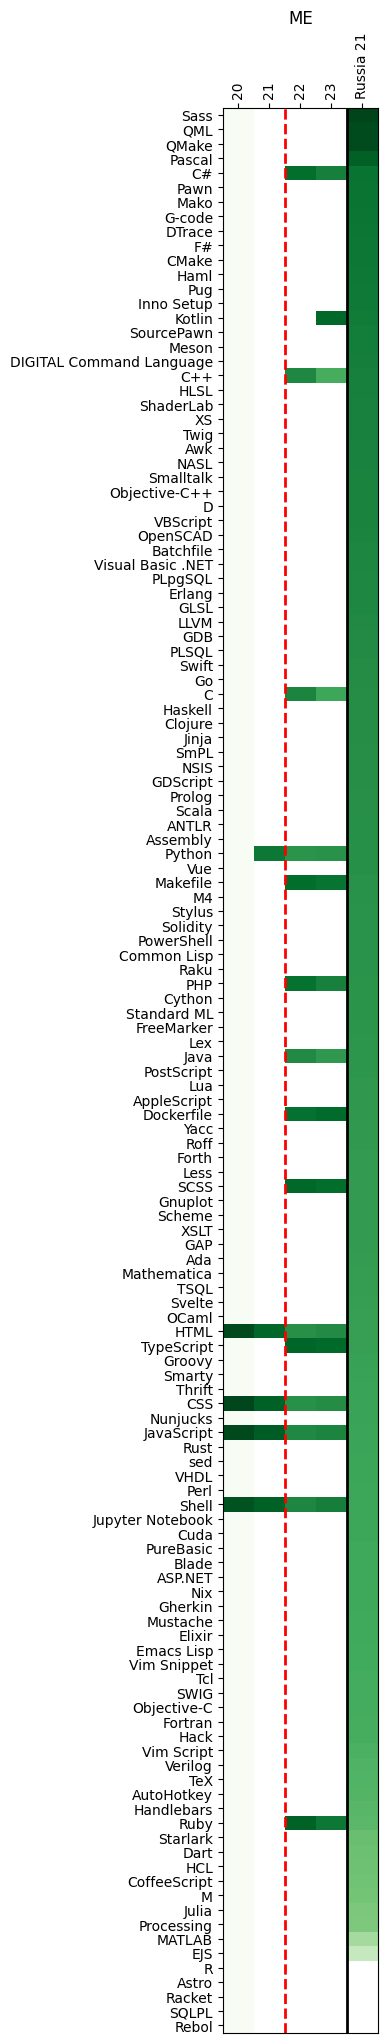

In [582]:
fig, ax = plt.subplots(figsize=(2,25)) 
absolute_changes = np.diff(np.vstack([v0,v1,v2,v3]), axis=0)
percentage_changes = np.diff(np.vstack([v0,v1,v2,v3]), axis=0) / np.vstack([v0,v1,v2,v3])[:-1] * 100

#cax = ax.imshow(np.vstack([absolute_changes]), cmap='viridis', interpolation='nearest', aspect='auto')
cax = ax.imshow((np.vstack([v0,v1,v2,v3,v4]).T)[::-1], cmap='Greens', interpolation='nearest', aspect='auto')
#ax.set_yticks([0, 1,2,3])
#ax.set_yticklabels(['21','22','23', 'Russia 21'])
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')  # Set the x-axis label to the top

ax.set_xticks([0, 1,2,3,4])
ax.set_xticklabels(['20','21','22','23', 'Russia 21'],rotation=90)

plt.title(comp)
ax.set_yticks([x for x in range(len(ubi_order))][::-1])

ax.set_yticklabels(ubi_order)
ax.axvline(x=1.5, color='red', linestyle='--', linewidth=2)
ax.axvline(x=3.5, color='black', linestyle='-', linewidth=2)

# Show the plot
plt.show()

In [535]:
absolute_changes = np.diff(np.vstack([v0,v1,v2,v3]), axis=0)
absolute_changes

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.26122162e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -2.95423302e+00,
         0.00000000e+00,  1.05216540e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -6.01943049e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.16925250e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.58382990e-02,
         0.00000000e+00,  9.05829854e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  5.28213410e-02,
         6.23978306e-02,  0.00000000e+00,  0.00000000e+0

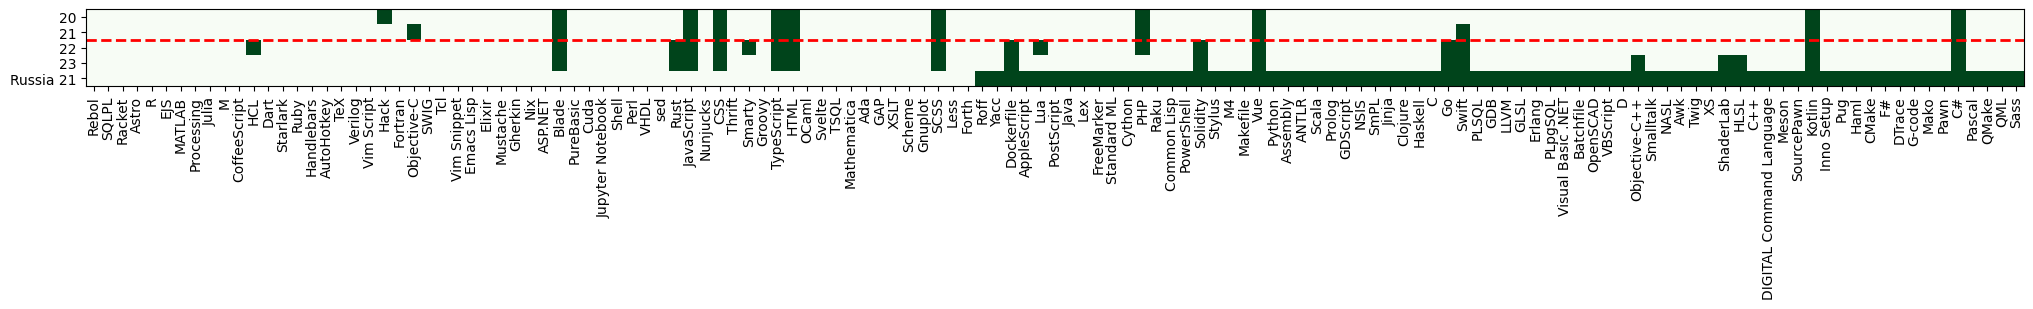

In [505]:
fig, ax = plt.subplots(figsize=(25, 1)) 

cax = ax.imshow(np.vstack([v0,v1,v2,v3,v4]), cmap='Greens', interpolation='nearest', aspect='auto')
ax.set_yticks([0, 1,2,3,4])
ax.set_yticklabels(['20','21','22','23', 'Russia 21'])

# Adjust the x-axis to show index positions if necessary
ax.set_xticks([x for x in range(len(ubi_order))])

ax.set_xticklabels(ubi_order,rotation=90)
ax.axhline(y=1.5, color='red', linestyle='--', linewidth=2)
# Show the plot
plt.show()


In [355]:
def correlation_plot_with_RU_RCA(country,year1=2021,year2=2022):
    langs_country = df[(df['iso2_code']==country)&(df['rca']>0)].language.unique()
    langs_russia =df[(df['iso2_code']=='RU')&(df['rca']>0)].language.unique()
    langs = set(langs_country)#.intersection(langs_russia)
    
    subset1=df[(df['year']==year1)&(df['iso2_code'].isin(['RU',country]))]#&(df['language'].isin(langs))]
    subset1=subset1.groupby(['iso2_code','language']).rca.mean().unstack(0).reset_index()
    minc=min(subset1[subset1[country]>0][country])
    minRU=min(subset1[subset1['RU']>0]['RU'])
    subset1[country]=subset1[country].map(lambda x: np.arcsinh(x))#np.log(x+minc/2))
    subset1['RU']=subset1['RU'].map(lambda x: np.arcsinh(x))#np.log(x+minRU/2))
    rho1=subset1.corr(method='spearman')['RU'][country]
    
    subset2=df[(df['year']==year2)&(df['iso2_code'].isin(['RU',country]))]#&(df['language'].isin(langs))]
    subset2=subset2.groupby(['iso2_code','language']).rca.mean().unstack(0).reset_index()
    minc=min(subset2[subset2[country]>0][country])
    minRU=min(subset2[subset2['RU']>0]['RU'])
    subset2[country]=subset2[country].map(lambda x: np.arcsinh(x))#np.log(x+minc/2))
    subset2['RU']=subset2['RU'].map(lambda x: np.arcsinh(x))#np.log(x+minRU/2))
    rho2=subset2.corr(method='spearman')['RU'][country]

    f,ax=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
    sns.regplot(x='RU',y=country,data=subset1,ax=ax[0])
    sns.regplot(x='RU',y=country,data=subset2,ax=ax[1])

    ax[0].grid(alpha=.1)
    ax[0].set_ylabel(country+' RCA (arcsinh)',size=12)
    ax[0].set_xlabel('Russia RCA (arcsinh)',size=12)
    ax[0].tick_params(axis='both', which='major', labelsize=12)  # Adjust major tick label sizes

    ax[1].grid(alpha=.1)
    ax[1].set_ylabel(country+' RCA (arcsinh)',size=12)
    ax[1].set_xlabel('Russia RCA (arcsinh)',size=12)
    ax[1].tick_params(axis='both', which='major', labelsize=12)  # Adjust major tick label sizes

    
    ax[0].text(s=r'$\rho =$ '+str(rho1.round(2)),x=.7,y=.9,size=15, transform=ax[0].transAxes)
    ax[1].text(s=r'$\rho =$ '+str(rho2.round(2)),x=.7,y=.9,size=15, transform=ax[1].transAxes)

    sns.despine()
    ax[0].set_title(year1,size=16)
    ax[1].set_title(year2,size=16)
    plt.show()

/var/folders/gf/x21_n30n2l13jz3jhcfzjc_40000gn/T/ipykernel_15850/1153802727.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rho1=subset1.corr(method='spearman')['RU'][country]
/var/folders/gf/x21_n30n2l13jz3jhcfzjc_40000gn/T/ipykernel_15850/1153802727.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rho2=subset2.corr(method='spearman')['RU'][country]


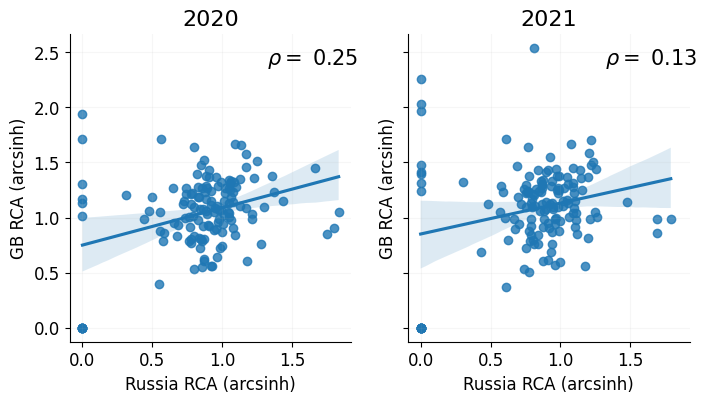

/var/folders/gf/x21_n30n2l13jz3jhcfzjc_40000gn/T/ipykernel_15850/1153802727.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rho1=subset1.corr(method='spearman')['RU'][country]
/var/folders/gf/x21_n30n2l13jz3jhcfzjc_40000gn/T/ipykernel_15850/1153802727.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rho2=subset2.corr(method='spearman')['RU'][country]


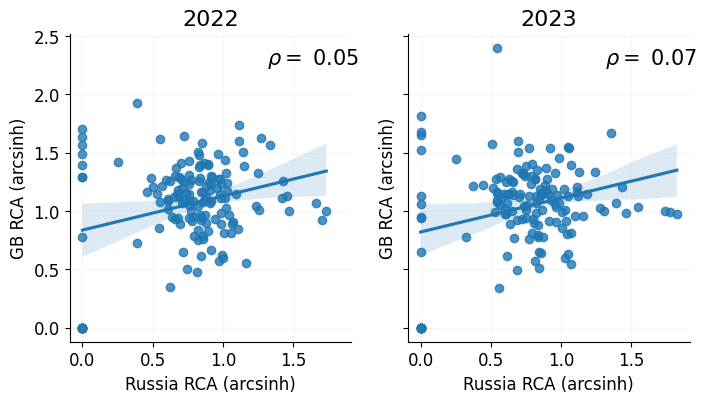

In [363]:
correlation_plot_with_RU_RCA('GB',year1=2020,year2=2021)
correlation_plot_with_RU_RCA('GB',year1=2022,year2=2023)


In [399]:
def correlation_plot_with_RU_RCA(country,year1=2022,year2=2023,method='pearson'):
    langs_country = df[(df['iso2_code']==country)&(df['rca']>0)].language.unique()
    langs_russia =df[(df['iso2_code']=='RU')&(df['rca']>0)].language.unique()
    langs = set(langs_country)#.intersection(langs_russia)
    
    subset1=df[(df['year']==year1)&(df['iso2_code'].isin(['RU',country]))]#&(df['language'].isin(langs))]
    subset1=subset1.groupby(['iso2_code','language']).rca.mean().unstack(0).reset_index()
    minc=min(subset1[subset1[country]>0][country])
    minRU=min(subset1[subset1['RU']>0]['RU'])
    #subset1[country]=subset1[country].map(lambda x: np.log(x+minc/10))
    #subset1['RU']=subset1['RU'].map(lambda x: np.log(x+minRU/10))
    rho1=subset1.corr(method=method)['RU'][country]
    
    subset2=df[(df['year']==year2)&(df['iso2_code'].isin(['RU',country]))]#&(df['language'].isin(langs))]
    subset2=subset2.groupby(['iso2_code','language']).rca.mean().unstack(0).reset_index()
    minc=min(subset2[subset2[country]>0][country])
    minRU=min(subset2[subset2['RU']>0]['RU'])
    #subset2[country]=subset2[country].map(lambda x: np.log(x+minc/10))
    #subset2['RU']=subset2['RU'].map(lambda x: np.log(x+minRU/10))
    rho2=subset2.corr(method=method)['RU'][country]

    f,ax=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
    sns.regplot(x='RU',y=country,data=subset1,ax=ax[0])
    sns.regplot(x='RU',y=country,data=subset2,ax=ax[1])

    ax[0].grid(alpha=.1)
    ax[0].set_ylabel(country+' RCA (log)',size=12)
    ax[0].set_xlabel('Russia RCA (log)',size=12)
    ax[0].tick_params(axis='both', which='major', labelsize=12)  # Adjust major tick label sizes

    ax[1].grid(alpha=.1)
    ax[1].set_ylabel(country+' RCA (log)',size=12)
    ax[1].set_xlabel('Russia RCA (log)',size=12)
    ax[1].tick_params(axis='both', which='major', labelsize=12)  # Adjust major tick label sizes

    
    ax[0].text(s=r'$\rho =$ '+str(rho1.round(2)),x=.7,y=.9,size=15, transform=ax[0].transAxes)
    ax[1].text(s=r'$\rho =$ '+str(rho2.round(2)),x=.7,y=.9,size=15, transform=ax[1].transAxes)

    sns.despine()
    ax[0].set_title(year1,size=16)
    ax[1].set_title(year2,size=16)
    plt.show()

/var/folders/gf/x21_n30n2l13jz3jhcfzjc_40000gn/T/ipykernel_15850/55295564.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rho1=subset1.corr(method=method)['RU'][country]
/var/folders/gf/x21_n30n2l13jz3jhcfzjc_40000gn/T/ipykernel_15850/55295564.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rho2=subset2.corr(method=method)['RU'][country]


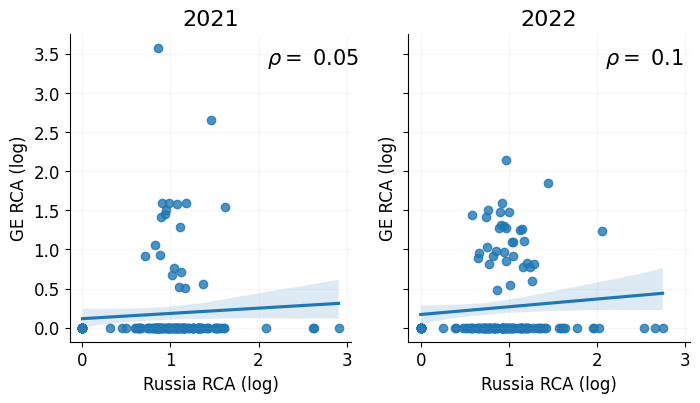

In [403]:
correlation_plot_with_RU_RCA('GE',year1=2021,year2=2022,method='kendall')


In [228]:
subset=df[(df['year']==2021)&(df['iso2_code'].isin(['RU','GE']))]
subset=subset.groupby(['iso2_code','language']).rca.mean().unstack(0).reset_index()

In [132]:
subset=subset[subset['GE']!=0]
subset['GE']=subset['GE'].map(np.log)
subset['RU']=subset['RU'].map(np.log)

In [152]:
rho=subset.corr()['RU'][country]


/var/folders/gf/x21_n30n2l13jz3jhcfzjc_40000gn/T/ipykernel_15850/1269197796.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rho=subset.corr()['RU'][country]


Text(0.5, 1.0, '2020')

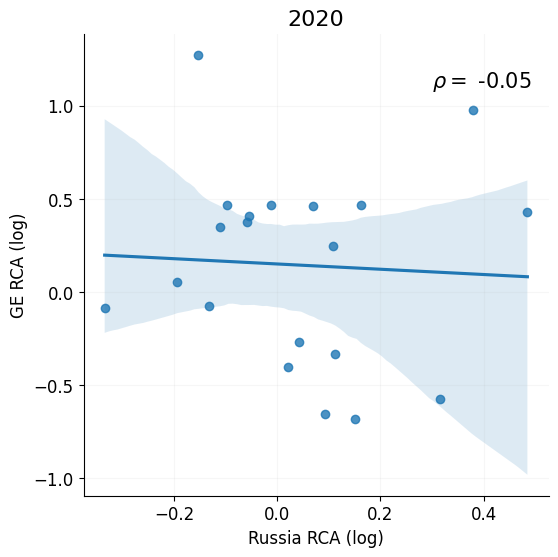

In [162]:
country = 'GE'
year=2020
plt.figure(figsize=(6,6))
sns.regplot(x='RU',y='GE',data=subset)
plt.grid(alpha=.1)
plt.ylabel(country+' RCA (log)',size=12)
plt.xlabel('Russia RCA (log)',size=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.annotate(r'$\rho =$ '+str(rho.round(2)),xy=(.3,1.1),size=15)
sns.despine()
plt.title(year,size=16)